Rebecca Black

For this analysis I use a dataset from “Data Mining for Business Analytics: Concepts, Techniques, and Applications with JMP Pro.” by Galit Shmueli. The original provided dataset was entitled GermanCredit.jmp, which I converted to .csv in order to conduct the analysis in R.

This dataset consists of 1000 observations each describing 30 attributes of a single credit applicant. The observations include a response variable indicating a good credit or bad credit designation.

The goal of this analysis is to predict whether an applicant has good or bad credit based on the measured attributes. I then make recommendations to a hypothetical bank stakeholder as to where and how to target potential credit applicants most likely to possess good credit (and hence be *least* likely to default on payment.)

In [1]:
#Read in data, extract useful variables, and modify variable classes 
#as needed

gc<-read.csv('GermanCredit.csv',header=T,na.strings=c(""))
names(gc)
gc = subset(gc, select = -c(OBS.))

gc$RESPONSE=as.factor(gc$RESPONSE)
gc$CHK_ACCT=as.factor(gc$CHK_ACCT)
gc$HISTORY=as.factor(gc$HISTORY)
gc$NEW_CAR=as.factor(gc$NEW_CAR)
gc$USED_CAR=as.factor(gc$USED_CAR)
gc$FURNITURE=as.factor(gc$FURNITURE)
gc$RADIO.TV=as.factor(gc$RADIO.TV)
gc$EDUCATION=as.factor(gc$EDUCATION)
gc$RETRAINING=as.factor(gc$RETRAINING)
gc$SAV_ACCT=as.factor(gc$SAV_ACCT)
gc$EMPLOYMENT=as.factor(gc$EMPLOYMENT)
gc$MALE_DIV=as.factor(gc$MALE_DIV)
gc$MALE_SINGLE=as.factor(gc$MALE_SINGLE)
gc$MALE_MAR_or_WID=as.factor(gc$MALE_MAR_or_WID)
gc$CO.APPLICANT=as.factor(gc$CO.APPLICANT)
gc$GUARANTOR=as.factor(gc$GUARANTOR)
gc$PRESENT_RESIDENT=as.factor(gc$PRESENT_RESIDENT)
gc$REAL_ESTATE=as.factor(gc$REAL_ESTATE)
gc$PROP_UNKN_NONE=as.factor(gc$PROP_UNKN_NONE)
gc$OTHER_INSTALL=as.factor(gc$OTHER_INSTALL)
gc$RENT=as.factor(gc$RENT)
gc$OWN_RES=as.factor(gc$OWN_RES)
gc$JOB=as.factor(gc$JOB)
gc$TELEPHONE=as.factor(gc$TELEPHONE)
gc$FOREIGN=as.factor(gc$FOREIGN)
gc$RESPONSE=as.factor(gc$RESPONSE)

[1] "OBS."             "CHK_ACCT"         "DURATION"         "HISTORY"         
 [5] "NEW_CAR"          "USED_CAR"         "FURNITURE"        "RADIO.TV"        
 [9] "EDUCATION"        "RETRAINING"       "AMOUNT"           "SAV_ACCT"        
[13] "EMPLOYMENT"       "INSTALL_RATE"     "MALE_DIV"         "MALE_SINGLE"     
[17] "MALE_MAR_or_WID"  "CO.APPLICANT"     "GUARANTOR"        "PRESENT_RESIDENT"
[21] "REAL_ESTATE"      "PROP_UNKN_NONE"   "AGE"              "OTHER_INSTALL"   
[25] "RENT"             "OWN_RES"          "NUM_CREDITS"      "JOB"             
[29] "NUM_DEPENDENTS"   "TELEPHONE"        "FOREIGN"          "RESPONSE"

CHK_ACCT         DURATION          HISTORY          NEW_CAR 
               0                0                0                0 
        USED_CAR        FURNITURE         RADIO.TV        EDUCATION 
               0                0                0                0 
      RETRAINING           AMOUNT         SAV_ACCT       EMPLOYMENT 
               0                0                0                0 
    INSTALL_RATE         MALE_DIV      MALE_SINGLE  MALE_MAR_or_WID 
               0                0                0                0 
    CO.APPLICANT        GUARANTOR PRESENT_RESIDENT      REAL_ESTATE 
               0                0                0                0 
  PROP_UNKN_NONE              AGE    OTHER_INSTALL             RENT 
               0                0                0                0 
         OWN_RES      NUM_CREDITS              JOB   NUM_DEPENDENTS 
               0                0                0                0 
       TELEPHONE          FOREIGN         RESPONSE 
               0                0                0

CHK_ACCT         DURATION          HISTORY          NEW_CAR 
               4               33                5                2 
        USED_CAR        FURNITURE         RADIO.TV        EDUCATION 
               2                2                2                2 
      RETRAINING           AMOUNT         SAV_ACCT       EMPLOYMENT 
               2              921                5                5 
    INSTALL_RATE         MALE_DIV      MALE_SINGLE  MALE_MAR_or_WID 
               4                2                2                2 
    CO.APPLICANT        GUARANTOR PRESENT_RESIDENT      REAL_ESTATE 
               2                2                4                2 
  PROP_UNKN_NONE              AGE    OTHER_INSTALL             RENT 
               2               53                2                2 
         OWN_RES      NUM_CREDITS              JOB   NUM_DEPENDENTS 
               2                4                4                2 
       TELEPHONE          FOREIGN         RESPONSE 
               2                2                2

Loading required package: Rcpp
## 
## Amelia II: Multiple Imputation
## (Version 1.7.4, built: 2015-12-05)
## Copyright (C) 2005-2017 James Honaker, Gary King and Matthew Blackwell
## Refer to http://gking.harvard.edu/amelia/ for more information
## 


 CHK_ACCT    DURATION    HISTORY NEW_CAR USED_CAR FURNITURE RADIO.TV EDUCATION
 0:274    Min.   : 4.0   0: 40   0:766   0:897    0:819     0:720    0:950    
 1:269    1st Qu.:12.0   1: 49   1:234   1:103    1:181     1:280    1: 50    
 2: 63    Median :18.0   2:530                                                
 3:394    Mean   :20.9   3: 88                                                
          3rd Qu.:24.0   4:293                                                
          Max.   :72.0                                                        
 RETRAINING     AMOUNT      SAV_ACCT EMPLOYMENT  INSTALL_RATE   MALE_DIV
 0:903      Min.   :  250   0:603    0: 62      Min.   :1.000   0:950   
 1: 97      1st Qu.: 1366   1:103    1:172      1st Qu.:2.000   1: 50   
            Median : 2320   2: 63    2:339      Median :3.000           
            Mean   : 3271   3: 48    3:174      Mean   :2.973           
            3rd Qu.: 3972   4:183    4:253      3rd Qu.:4.000           
         

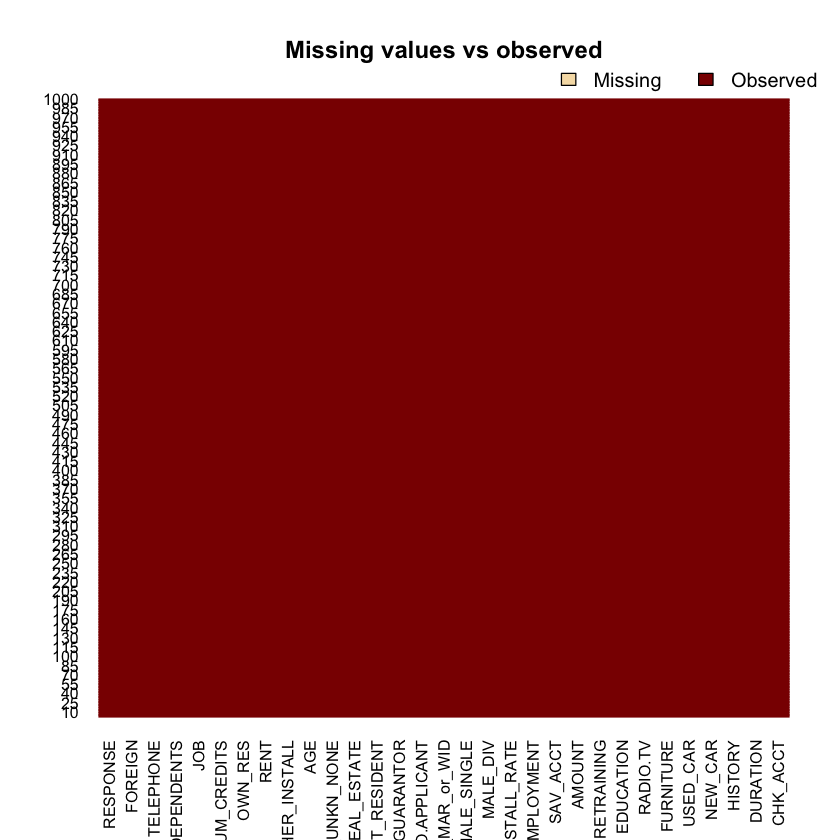

In [2]:
#Visualize any missing values and tally the number of unique values
sapply(gc,function(x) sum(is.na(x)))
sapply(gc, function(x) length(unique(x)))
library(Amelia)
missmap(gc, main = "Missing values vs observed")
    
#Get a quick summary as a reality check
summary(gc)

In [3]:
#Divide the data into training and validation sets:

library(dplyr)
train <- gc[sample(1:nrow(gc), 0.70*nrow(gc),replace=FALSE),]
test<-setdiff(gc, train)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




Call:
glm(formula = RESPONSE ~ ., family = binomial(link = "logit"), 
    data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.6504  -0.7297   0.3549   0.7084   2.4661  

Coefficients:
                    Estimate Std. Error z value Pr(>|z|)    
(Intercept)        1.870e+00  1.291e+00   1.448 0.147533    
CHK_ACCT1          2.284e-01  2.638e-01   0.866 0.386629    
CHK_ACCT2          7.867e-01  4.302e-01   1.829 0.067464 .  
CHK_ACCT3          1.739e+00  2.767e-01   6.284 3.29e-10 ***
DURATION          -2.463e-02  1.092e-02  -2.255 0.024125 *  
HISTORY1           5.731e-01  6.466e-01   0.886 0.375498    
HISTORY2           8.555e-01  5.077e-01   1.685 0.091952 .  
HISTORY3           1.008e+00  5.564e-01   1.812 0.069922 .  
HISTORY4           1.763e+00  5.189e-01   3.397 0.000680 ***
NEW_CAR1          -5.831e-01  4.612e-01  -1.264 0.206112    
USED_CAR1          1.046e+00  5.895e-01   1.774 0.076008 .  
FURNITURE1        -2.787e-02  4.810e-01  -0.058 0.

,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,699,869.9147,NA
CHK_ACCT,3,96.717802302,696,773.1969,7.890636e-21
DURATION,1,25.588576577,695,747.6084,4.225335e-07
HISTORY,4,20.346569693,691,727.2618,4.265593e-04
NEW_CAR,1,8.839170271,690,718.4226,2.948332e-03
USED_CAR,1,3.747455502,689,714.6752,5.288796e-02
FURNITURE,1,1.359042972,688,713.3161,2.437034e-01
RADIO.TV,1,1.016309237,687,712.2998,3.133961e-01
EDUCATION,1,3.682848029,686,708.6170,5.497487e-02
RETRAINING,1,0.580124117,685,708.0368,4.462637e-01


Loading required package: MASS

Attaching package: ‘MASS’

The following object is masked from ‘package:dplyr’:

    select

Loading required package: lattice
Classes and Methods for R developed in the

Political Science Computational Laboratory

Department of Political Science

Stanford University

Simon Jackman

hurdle and zeroinfl functions by Achim Zeileis



llh      llhNull           G2     McFadden         r2ML         r2CU 
-317.3348353 -434.9573688  235.2450669    0.2704231    0.2854229    0.4012094

[1] "Accuracy 0.8"


Loading required package: gplots

Attaching package: ‘gplots’

The following object is masked from ‘package:stats’:

    lowess



[1] 0.8208467

,FALSE,TRUE,class.error
FALSE,118,64,0.4611872
TRUE,101,417,0.1330561


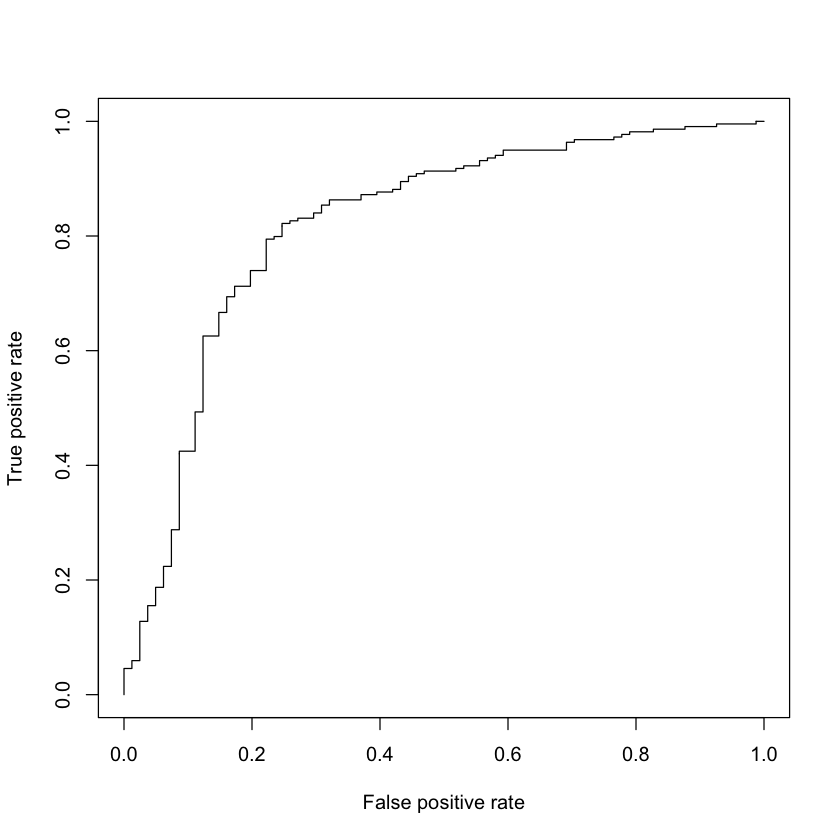

In [4]:
#Develop a classification model using Logistic regression
log_model <- glm(RESPONSE ~.,family=binomial(link='logit'),data=train)
summary(log_model)
anova(log_model, test="Chisq")

#Obtain McFadden's pseudo R^2:
library(pscl)
pR2(log_model)

#Now let's test the model on the test set:
fitted.results <- predict(log_model,newdata=test,type='response')
fitted.results <- ifelse(fitted.results > 0.5,1,0)

misClasificError <- mean(fitted.results != test$RESPONSE)
print(paste('Accuracy',1-misClasificError))

library(ROCR)
p <- predict(log_model,newdata=test,type='response')
pr <- prediction(p, test$RESPONSE)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)

auc <- performance(pr, measure = "auc")
auc <- auc@y.values[[1]]
auc

#True class is on horizontal, predicted class is on vertical
confusion.glm <- function(data, model) {
  prediction <- ifelse(predict(model, data, type='response') > 0.5, TRUE, FALSE)
  confusion  <- table(prediction, as.logical(model$y))
  confusion  <- cbind(confusion, c(1 - confusion[1,1]/(confusion[1,1]+confusion[2,1]), 1 - confusion[2,2]/(confusion[2,2]+confusion[1,2])))
  confusion  <- as.data.frame(confusion)
  names(confusion) <- c('FALSE', 'TRUE', 'class.error')
  confusion
}
confusion.glm(train,log_model)

The Logistic Regression Model resulted in 8 statistically significant predictor variables (those with p-values less than 0.05.) The AIC for the model is 699, McFadden's pseudo R^2 is 0.29, and the accuracy of the classifier is 0.746. The ROC plot shows that our classifier is clearly much better than merely random guessing.

Let's go ahead and see if we can improve the predictive accuracy of our model by using a classification tree:


Classification tree:
tree(formula = RESPONSE ~ ., data = gc)
Variables actually used in tree construction:
[1] "CHK_ACCT"      "DURATION"      "HISTORY"       "SAV_ACCT"     
[5] "OTHER_INSTALL"
Number of terminal nodes:  7 
Residual mean deviance:  1.016 = 1009 / 993 
Misclassification error rate: 0.235 = 235 / 1000 

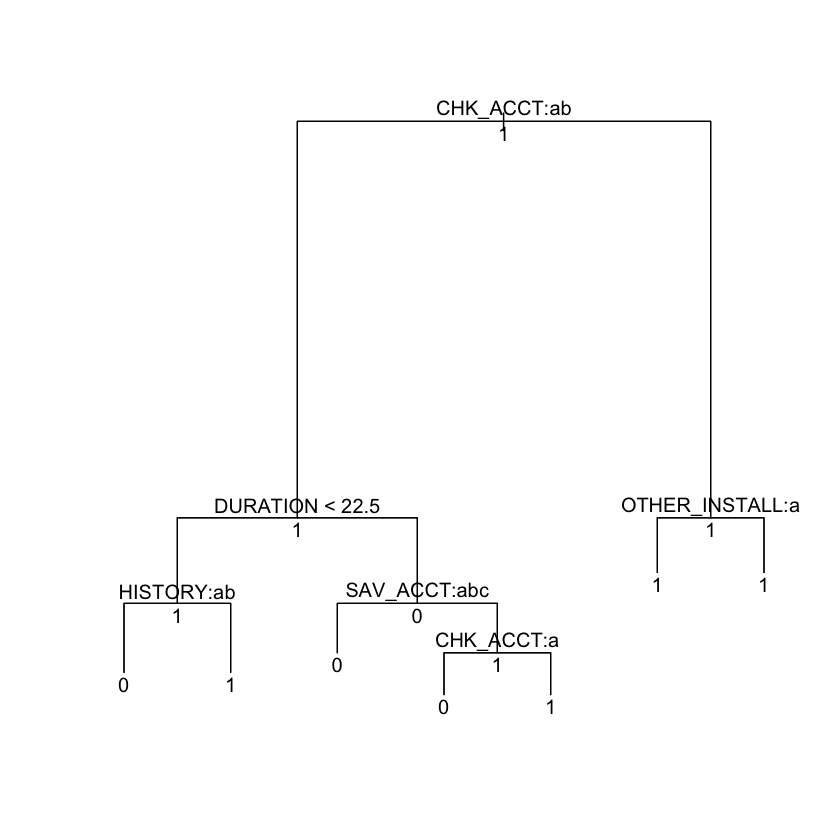

In [5]:
#Classification tree
library(tree)
defaultTree = tree(RESPONSE ~ .,data = gc)
summary(defaultTree)

plot(defaultTree)
text(defaultTree, all = T)

The classification tree was constructed with 7 terminal nodes, and a misclassification error rate of 0.235 which translates into an accuracy of 0.765 - slightly better than the Logistic Regression Model. In practice, either model would work well for the purpose of assessing the viability of a credit applicant.

My recommendation is to choose the Logistic Regression model since that gives us a better sense of the relative importance of various factors on whether an applicant is likely to default on their credit.

We can use the results of the Logistic Regression Analysis to determine how to target potential credit applicants most likely to possess a credit designation of good (e.g. the case when the variable RESPONSE takes on a value of 1.)

Now R uses RESPONSE=0 as the reference category. So the regression coefficients here are the effect of a unit increase of the predictor variable (while all other predictor variables are held constant) on the log odds of bad credit. For this reason we consider only the predictors with negative coefficients since they indicate an effect that is correlated with decrease in log odds of bad credit.

So for the statistically significant predictors with negative coefficients:
For every one unit change in Duration (duration of credit in months), the log odds of having bad credit (versus good credit) decreases by 0.0319
For every one unit increase in Amount (credit amount), the log odds of having bad credit decreases by 0.000011
For every one unit increase in Installment Rate (as percentage of annual income,) the log odds of bad credit decreases by 0.42.

From a practical standpoint this suggests that we focus our marketing efforts on customers that have established credit of duration greater than 12 months, which means the odds ratio of the customer having good credit to bad credit is 1.466385. Additionally we may want to place a lower limit on installment rate as percentage of annual income, since even a 5 percentage point increase in installment rate makes a customer more than 8 times more likely to maintain good credit.
